# Rates calculation

This notebooks demonstrates basic rates calculation method. We say "basic"
because we have also implemented a PyTorch module for rates calculation that can work on GPU. 

In [1]:
import sys
import numpy as np
import pandas as pd
from datetime import timedelta

sys.path.append('..')

from deepfield import Field

The provided `norne_simplified` model (in the `/open_data` directory) contains an archive `RESULTS.zip` with model states precomputed. Unzip it before loading the model and load the model as usual:

In [2]:
model = Field('../open_data/norne_simplified/norne_simplified.data').load()

INFO:Field:Using default config.
INFO:Field:Start reading X files.
INFO:Field:Start reading ../open_data/norne_simplified/RESULTS/norne_simplified.X0000
INFO:Field:Decoding PRESSURE.
INFO:Field:Decoding RS.
INFO:Field:Decoding SGAS.
INFO:Field:Decoding SOIL.
INFO:Field:Decoding SWAT.
INFO:Field:Finish reading ../open_data/norne_simplified/RESULTS/norne_simplified.X0000
INFO:Field:Start reading ../open_data/norne_simplified/RESULTS/norne_simplified.X0001
...
INFO:Field:===== Field summary =====
INFO:Field:GRID attributes: MAPAXES, ZCORN, COORD, ACTNUM, DIMENS
INFO:Field:ROCK attributes: PORO, PERMX, PERMY, PERMZ
INFO:Field:STATES attributes: PRESSURE, RS, SGAS, SOIL, SWAT
INFO:Field:TABLES attributes: PVTO, ROCK, PVTW, DENSITY, SWOF, SGOF, PVDG
INFO:Field:WELLS attributes: COMPDAT, WCONPROD, WELLTRACK, WELSPECS, RESULTS
INFO:Field:AQUIFERS attributes: 
INFO:Field:=========================
INFO:Field:Grid pillars (`COORD`) are mapped to new axis with respect to `MAPAXES`.


Required well's preprocessing:

In [3]:
(model.wells
 .drop_incomplete()
 .get_wellblocks(model.grid)
 .drop_outside()
 .apply_perforations()
 .calculate_cf(rock=model.rock, grid=model.grid)
 .compute_events(grid=model.grid))

Get rates (by default CPU multiprocessing is used):

In [4]:
model.calculate_rates()

Processed 36 out of 36 wells


Now we can check daily rates data:

In [5]:
model.wells.total_rates.head()

,DATE,WOPR,WWPR,WGPR,WFGPR
0,1997-11-06,0,0,0,0
1,1997-11-14,2880.78,76.2005,312997,0.000929364
2,1997-12-01,3725.33,103.742,404331,0.00830324
3,1997-12-17,5669.06,149.429,614381,0.0128034
4,1998-01-01,9854.53,255.11,1.06806e+06,32.0162


and cumulative rates:

In [6]:
model.wells.cum_rates.head()

,DATE,WOPR,WWPR,WGPR,WFGPR
0,1997-11-06,0,0,0,0
1,1997-11-14,2880.78,76.2005,312997,0.000929364
2,1997-12-01,6606.12,179.943,717328,0.0092326
3,1997-12-17,12275.2,329.372,1.33171e+06,0.022036
4,1998-01-01,22129.7,584.481,2.39977e+06,32.0383


Note: to get detailed rates for each block see the `BLOCKS_DYNAMICS` attribute.

Rates can be quickly visualized using `show_rates` method:
```python
model.wells.show_rates()
```
It activates an interactive widget where one can specify wellname, phase, time interval and cumulative mode as shown below:

<p>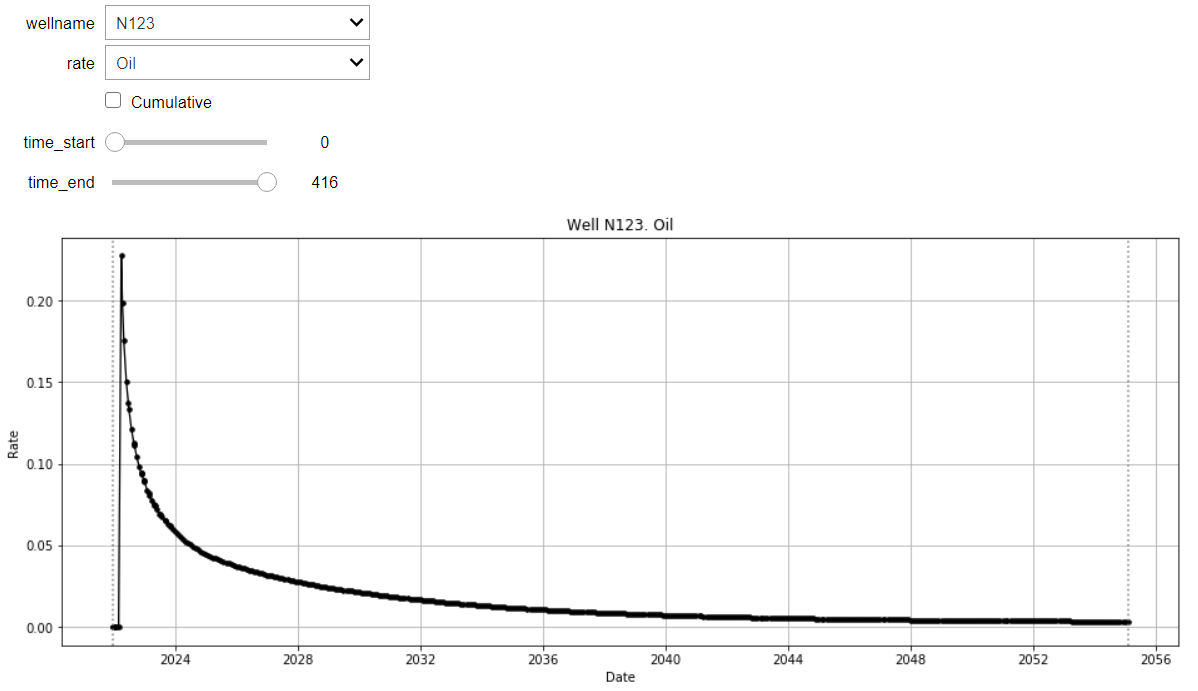</p>

Note: to get detailed plots for each block use 
```python
model.wells.show_blocks_dynamics()
```

Done!